### Importing libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from datetime import datetime
import ast

### Loading the dataset

In [2]:
lloyds_users_df = pd.read_csv('SavedData/Lloyds_users.csv')

In [3]:
lloyds_users_df

,user_id,total_tx_count,net_tx_count,total_tx_sum_gbp,net_tx_sum_gbp,sent_tx_count,sent_tx_sum_gbp,sent_tx_mean_gbp,sent_tx_median_gbp,received_tx_count,...,received_tx_mean_gbp,received_tx_median_gbp,user_biz_interaction,user_biz_interaction_frequency,user_user_interaction,user_user_interaction_frequency,user_industry_interaction,user_industry_interaction_frequency,user_date_transaction,user_date_transaction_freq
0,1000,1903,1517,37720.11,19676.91,1710,28698.51,7.854277,4.50,193,...,46.744041,5.5,"['A_CAFE', 'A_LOCAL_COFFEE_SHOP', 'A_SUPERMARK...","[116, 117, 2, 72, 5, 9, 19, 1, 35, 119, 1, 2, ...","['16354', '18013', '30208', '31489', '36647', ...","[55, 14, 6, 12, 1, 14, 5, 14, 1, 18, 21, 1, 27...","['Alcohol', 'Apparel', 'Books', 'Cafes', 'Chil...","[2, 1, 1, 813, 2, 3, 37, 1, 7, 2, 30, 21, 353,...","['01/01/2025', '01/02/2025', '01/03/2025', '01...","[5, 5, 13, 6, 2, 9, 5, 8, 6, 5, 5, 7, 4, 7, 2,..."
1,10000,1114,720,21360.39,18944.39,917,20152.39,21.372710,11.00,197,...,6.131980,6.0,"['A_CAFE', 'A_LOCAL_COFFEE_SHOP', 'A_SUPERMARK...","[6, 1, 16, 71, 59, 3, 9, 7, 33, 2, 22, 7, 9, 2...","['15896', '28620', '33124', '33732', '34123', ...","[39, 49, 1, 19, 10, 9, 59, 17, 29, 22, 19, 13]","['Alcohol', 'Apparel', 'Books', 'Cafes', 'Coff...","[1, 23, 34, 23, 1, 51, 2, 1, 14, 312, 119, 3, ...","['01/02/2025', '01/03/2025', '01/04/2025', '01...","[3, 4, 1, 8, 3, 3, 2, 3, 2, 6, 3, 7, 1, 9, 7, ..."
2,100000,1919,1433,23455.27,20720.37,1676,22087.82,11.567202,4.50,243,...,5.627366,6.0,"['ACCESSORY_SHOP', 'A_CAFE', 'A_LOCAL_COFFEE_S...","[5, 106, 129, 16, 95, 5, 11, 1, 122, 20, 1, 5,...","['12753', '24398', '24951', '28719', '34678', ...","[19, 14, 24, 54, 17, 21, 6, 19, 9, 30, 27, 30,...","['Accessories', 'Alcohol', 'Apparel', 'Cafes',...","[15, 6, 1, 828, 10, 58, 5, 2, 18, 1, 334, 65, ...","['01/01/2025', '01/02/2025', '01/03/2025', '01...","[3, 3, 10, 2, 3, 12, 5, 6, 3, 3, 3, 3, 4, 6, 1..."
3,100002,1561,1233,22393.96,20303.16,1397,21348.56,13.390346,4.50,164,...,6.374390,6.0,"['A_CAFE', 'A_LOCAL_COFFEE_SHOP', 'A_SUPERMARK...","[50, 59, 18, 155, 1, 48, 1, 4, 26, 9, 14, 58, ...","['10432', '14001', '3296', '37438', '37918', '...","[8, 1, 5, 1, 6, 10, 11, 7, 27, 2, 2, 1, 17, 4,...","['Alcohol', 'Apparel', 'Books', 'Cafes', 'Chil...","[7, 32, 2, 281, 2, 3, 33, 4, 2, 10, 269, 511, ...","['01/01/2025', '01/02/2025', '01/03/2025', '01...","[3, 7, 6, 2, 5, 14, 2, 14, 3, 2, 5, 4, 2, 4, 4..."
4,100019,1157,719,44632.75,16232.85,938,30432.80,20.213062,9.00,219,...,64.839954,6.0,"['A_CAFE', 'A_LOCAL_COFFEE_SHOP', 'A_SUPERMARK...","[50, 54, 15, 91, 1, 1, 2, 11, 1, 9, 7, 68, 9, ...","['22634', '38580', '40565', '44911', '61350', ...","[21, 33, 18, 4, 24, 11, 28, 25, 27, 58]","['Alcohol', 'Apparel', 'Books', 'Cafes', 'Chil...","[1, 25, 1, 214, 4, 1, 38, 1, 12, 13, 314, 1, 6...","['01/02/2025', '01/03/2025', '01/06/2025', '01...","[6, 8, 3, 1, 4, 2, 2, 9, 1, 5, 3, 3, 2, 5, 3, ..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8137,99939,1488,1078,20117.08,17723.34,1283,18920.21,14.180119,9.00,205,...,5.838390,6.0,"['A_CAFE', 'A_LOCAL_COFFEE_SHOP', 'A_SUPERMARK...","[56, 56, 13, 80, 57, 8, 3, 8, 2, 2, 44, 51, 23...","['15880', '24365', '24475', '2858', '33124', '...","[6, 34, 17, 50, 1, 25, 31, 21, 22, 27, 13, 51,...","['Alcohol', 'Apparel', 'Books', 'Cafes', 'Chil...","[2, 2, 38, 227, 25, 7, 46, 3, 2, 2, 37, 25, 34...","['01/01/2025', '01/02/2025', '01/03/2025', '01...","[2, 13, 4, 2, 7, 2, 13, 3, 3, 2, 1, 4, 2, 1, 6..."
8138,99949,1188,818,15007.49,12916.23,1003,13961.86,11.999075,6.00,185,...,5.652054,6.0,"['A_CAFE', 'A_LOCAL_COFFEE_SHOP', 'A_SUPERMARK...","[61, 48, 4, 72, 7, 4, 1, 5, 2, 2, 36, 50, 9, 1...","['1697', '32368', '33124', '39937', '52658', '...","[22, 21, 2, 11, 52, 14, 8, 27, 19, 16, 64, 42,...","['Alcohol', 'Apparel', 'Books', 'Cafes', 'Chil...","[3, 3, 2, 215, 1, 4, 22, 1, 3, 25, 1, 368, 23,...","['01/02/2025', '01/03/2025', '01/04/2025', '01...","[2, 11, 1, 2, 8, 2, 7, 1, 3, 1, 2, 14, 

## RFM Analysis

### Creating the columns

To calculate the recency value, I will calculate the days between the first date recorded (01/01/2025) and the user's most recent date of transaction. The Frequency value is from the 'total_tx_count' column, and the Monetary value is from the 'total_tx_sum_gbp' column.

In [4]:
lloyds_users_df['user_date_transaction'] = lloyds_users_df['user_date_transaction'].apply(ast.literal_eval)

# Parse the 'user_date_transaction' column to find the most recent transaction date
lloyds_users_df['most_recent_tx'] = lloyds_users_df['user_date_transaction'].apply(
    lambda dates: max([datetime.strptime(date, '%d/%m/%Y') for date in dates])
)

# Define the reference date (the starting point to calculate recency)
reference_date = datetime.strptime('01/01/2025', '%d/%m/%Y')

# Calculate Recency
lloyds_users_df['Recency'] = (lloyds_users_df['most_recent_tx'] - reference_date).dt.days

# Prepare the new DataFrame for RFM analysis
# Assuming 'total_tx_count' is the Frequency and 'total_tx_sum_gbp' is the Monetary value
rfm_df = lloyds_users_df[['user_id', 'Recency', 'total_tx_count', 'total_tx_sum_gbp']].copy()
rfm_df.columns = ['user_id', 'Recency', 'Frequency', 'Monetary']

# Placeholder for RFM Score calculation
# You'll need to decide how to score each of the RFM components (Recency, Frequency, Monetary)
# and then calculate the RFM Score based on your business logic or analysis requirements



In [5]:
rfm_df.head(50)

,user_id,Recency,Frequency,Monetary
0,1000,364,1903,37720.11
1,10000,361,1114,21360.39
2,100000,364,1919,23455.27
3,100002,364,1561,22393.96
4,100019,364,1157,44632.75
5,10004,364,1862,18868.67
6,100053,364,1652,40478.88
7,100060,364,1377,19736.97
8,100086,363,1445,22634.20
9,100094,363,694,23390.81


In [7]:
rfm_df.describe()

,user_id,Recency,Frequency,Monetary
count,8142.000000,8142.000000,8142.000000,8142.000000
mean,50826.578605,363.726603,1423.834930,28492.976394
std,28946.392695,0.641999,368.671402,28058.493848
min,1000.000000,360.000000,441.000000,9012.840000
25%,25450.250000,364.000000,1151.000000,18870.995000
50%,50860.500000,364.000000,1344.500000,22311.565000
75%,75606.750000,364.000000,1682.000000,32637.847500
max,100988.000000,364.000000,3417.000000,524178.630000


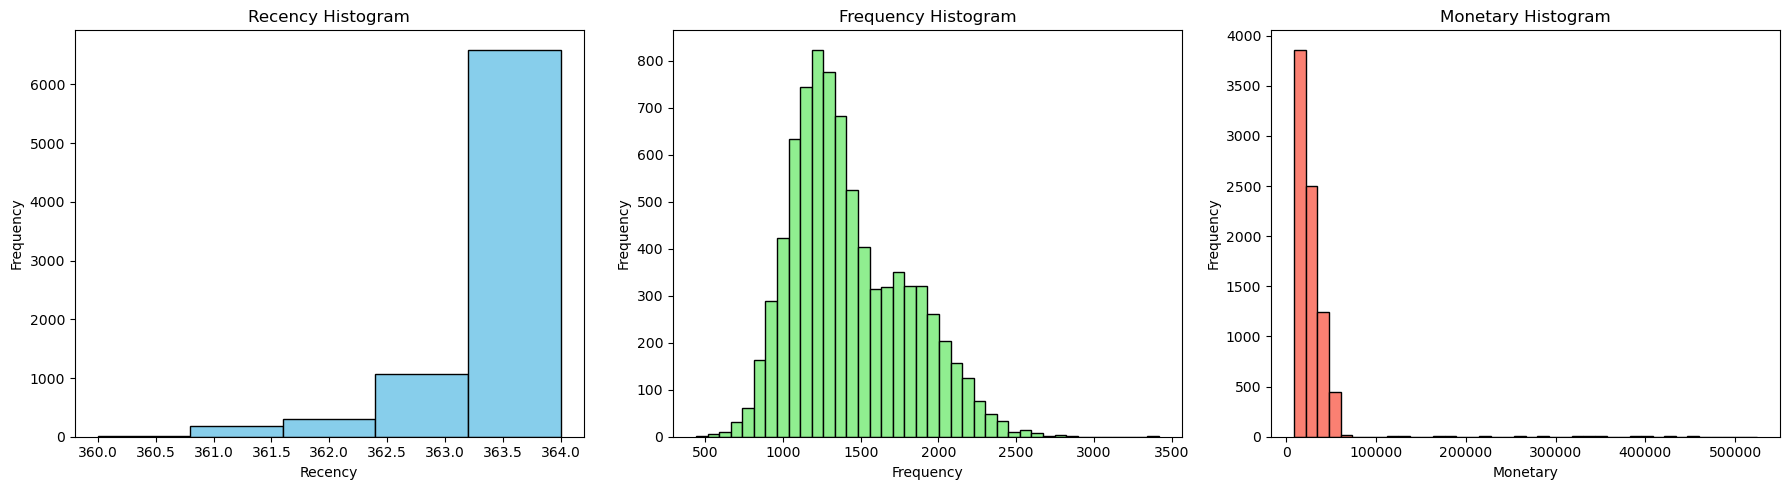

In [9]:
# Create histograms
fig, ax = plt.subplots(1, 3, figsize=(18, 5))  # Setup a figure with 3 subplots

# Recency Histogram
rfm_df['Recency'].plot(kind='hist', ax=ax[0], bins=5, color='skyblue', edgecolor='black')
ax[0].set_title('Recency Histogram')
ax[0].set_xlabel('Recency')
ax[0].set_ylabel('Frequency')

# Frequency Histogram
rfm_df['Frequency'].plot(kind='hist', ax=ax[1], bins=40, color='lightgreen', edgecolor='black')
ax[1].set_title('Frequency Histogram')
ax[1].set_xlabel('Frequency')

# Monetary Histogram
rfm_df['Monetary'].plot(kind='hist', ax=ax[2], bins=40, color='salmon', edgecolor='black')
ax[2].set_title('Monetary Histogram')
ax[2].set_xlabel('Monetary')

plt.tight_layout()  
plt.show()


There are many ways to calculate the RFM scores. After exploring my data and researching papers on RFM analysis, I decided to use a scale of 1-4 rather than 1-5 (the common way) given there is only 8142 unique customers in the dataset. Moreover, I will be assigning the scores for Frequency and Monetary values through using quartiles, since there is enough variation in the data to be split into 4 groups. However, all unique accounts seemed to have completed transactions in the last 5 days of the year. Therefore, I will assign a highest score of 4 to all of those who spent money on the last day of the year, and give the accounts who spent in the last 5 days of the year a 3. 

In [13]:
rfm_df['R_Score'] = rfm_df['Recency'].apply(lambda x: 4 if x == 364 else (3 if 360 <= x <= 363 else 1))
rfm_df['F_Score'] = pd.qcut(rfm_df['Frequency'], 4, labels=[1, 2, 3, 4]).astype(int)
rfm_df['M_Score'] = pd.qcut(rfm_df['Monetary'], 4, labels=[1, 2, 3, 4]).astype(int)

# Calculate RFM_Score with the adjusted R_Score
rfm_df['RFM_Score'] = rfm_df['R_Score'].astype(str) + rfm_df['F_Score'].astype(str) + rfm_df['M_Score'].astype(str)

# Display the updated DataFrame to show the adjusted RFM Scores based on the corrected criteria
rfm_df[['user_id', 'Recency', 'Frequency', 'Monetary', 'R_Score', 'F_Score', 'M_Score', 'RFM_Score']].head(30)


,user_id,Recency,Frequency,Monetary,R_Score,F_Score,M_Score,RFM_Score
0,1000,364,1903,37720.11,4,4,4,444
1,10000,361,1114,21360.39,3,1,2,312
2,100000,364,1919,23455.27,4,4,3,443
3,100002,364,1561,22393.96,4,3,3,433
4,100019,364,1157,44632.75,4,2,4,424
5,10004,364,1862,18868.67,4,4,1,441
6,100053,364,1652,40478.88,4,3,4,434
7,100060,364,1377,19736.97,4,3,2,432
8,100086,363,1445,22634.20,3,3,3,333
9,100094,363,694,23390.81,3,1,3,313


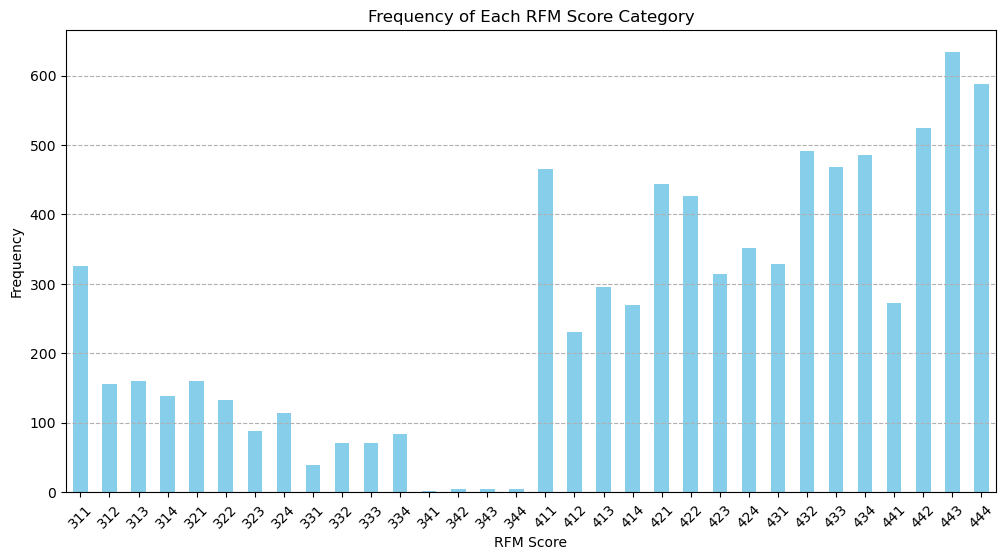

In [33]:
# Creating a histogram for the frequency of each RFM score category

# Count the frequency of each RFM score category
rfm_score_counts = rfm_df['RFM_Score'].value_counts()

# Sort the RFM scores to ensure the histogram follows a logical order
rfm_score_counts = rfm_score_counts.sort_index()

# Plotting
plt.figure(figsize=(12, 6))
rfm_score_counts.plot(kind='bar', color='skyblue')
plt.title('Frequency of Each RFM Score Category')
plt.xlabel('RFM Score')
plt.ylabel('Frequency')
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--')

plt.show()


In [34]:
import pandas as pd

# Assuming 'rfm_df' is your DataFrame and it includes a column 'RFM_Score' with RFM scores as strings.

# Function to calculate the sum of digits in the RFM score
def sum_of_digits(score):
    return sum(int(digit) for digit in score)

# Adding a new column to the DataFrame for the sum of RFM score digits
rfm_df['Sum_of_Score'] = rfm_df['RFM_Score'].apply(sum_of_digits)

# Defining the sum ranges for each category
champion_value_sums = [11, 12]
high_value_sum_range = range(9, 11)  # Includes 9 and 10
middle_value_sum_range = range(7, 9)  # Includes 7 and 8
low_value_sum_range = range(3, 7)  # Includes 3 through 6

# Categorizing based on sum
rfm_df['Customer_Segment_RFM'] = 'Low Value'  # Default to Low Value

# Applying categorizations
rfm_df.loc[rfm_df['Sum_of_Score'].isin(champion_value_sums), 'Customer_Segment_RFM'] = 'Champion Value'
rfm_df.loc[rfm_df['Sum_of_Score'].isin(high_value_sum_range), 'Customer_Segment_RFM'] = 'High Value'
rfm_df.loc[rfm_df['Sum_of_Score'].isin(middle_value_sum_range), 'Customer_Segment_RFM'] = 'Middle Value'
rfm_df['Customer_Segment_RFM'].value_counts()

High Value        2967
Middle Value      2357
Champion Value    1713
Low Value         1105
Name: Customer_Segment_RFM, dtype: int64

In [35]:
rfm_df

,user_id,Recency,Frequency,Monetary,R_Score,F_Score,M_Score,RFM_Score,Cluster,Sum_of_Score,Customer_Segment_RFM
0,1000,364,1903,37720.11,4,4,4,444,1,12,Champion Value
1,10000,361,1114,21360.39,3,1,2,312,2,6,Low Value
2,100000,364,1919,23455.27,4,4,3,443,1,11,Champion Value
3,100002,364,1561,22393.96,4,3,3,433,0,10,High Value
4,100019,364,1157,44632.75,4,2,4,424,0,10,High Value
...,...,...,...,...,...,...,...,...,...,...,...
8137,99939,363,1488,20117.08,3,3,2,332,2,8,Middle Value
8138,99949,364,1188,15007.49,4,2,1,421,0,7,Middle Value
8139,99952,364,1501,47107.19,4,3,4,434,0,11,Champion Value
8140,99988,364,1450,37715.77,4,3,4,434,0,11,Champion Value


Reward customers based on their customer segment

### Clustering Customer Segments through k-means

/Users/jessiebloom/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/Users/jessiebloom/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/Users/jessiebloom/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/Users/jessiebloom/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_

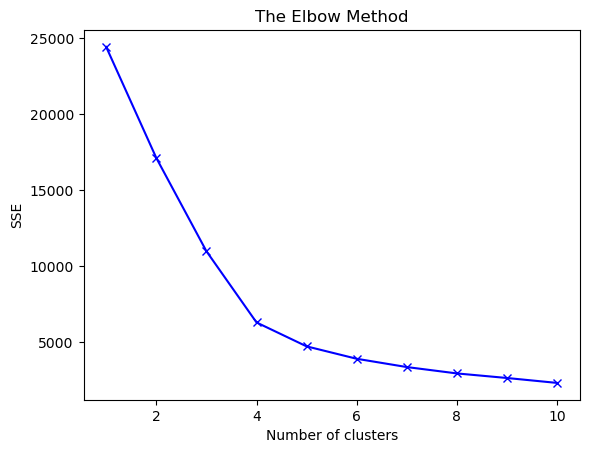

In [36]:
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
import pandas as pd
import numpy as np

scaler = StandardScaler()
rfm_scaled = scaler.fit_transform(rfm_df[['Recency', 'Frequency', 'Monetary']])

sse = {}
for k in range(1, 11):
    kmeans = KMeans(n_clusters=k, random_state=1)
    kmeans.fit(rfm_scaled)
    sse[k] = kmeans.inertia_  
    

plt.figure()
plt.plot(list(sse.keys()), list(sse.values()), 'bx-')
plt.xlabel('Number of clusters')
plt.ylabel('SSE')
plt.title('The Elbow Method')
plt.show()


In [47]:
#Run the K-means algorithm
# Choose the optimal number of clusters 
kmeans = KMeans(n_clusters=4, random_state=1)
rfm_df['Customer_Segment_Kmeans'] = kmeans.fit_predict(rfm_scaled)

# Accessing the centroids
centroids = kmeans.cluster_centers_

# If you want to display the centroids:
print("Centroids of each cluster:")
for i, centroid in enumerate(centroids):
    print(f"Cluster {i}: {centroid}")
    
rfm_df.head(20)

Centroids of each cluster:
Cluster 0: [ 0.42587908 -0.49281795 -0.10217403]
Cluster 1: [0.41772014 1.24799879 0.01005298]
Cluster 2: [-1.81896512 -0.74691155 -0.12250595]
Cluster 3: [ 0.11433304  0.96302945 10.52365655]


/Users/jessiebloom/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


,user_id,Recency,Frequency,Monetary,R_Score,F_Score,M_Score,RFM_Score,Cluster,Sum_of_Score,Customer_Segment_RFM,Customer_Segment_Kmeans
0,1000,364,1903,37720.11,4,4,4,444,1,12,Champion Value,1
1,10000,361,1114,21360.39,3,1,2,312,2,6,Low Value,2
2,100000,364,1919,23455.27,4,4,3,443,1,11,Champion Value,1
3,100002,364,1561,22393.96,4,3,3,433,0,10,High Value,0
4,100019,364,1157,44632.75,4,2,4,424,0,10,High Value,0
5,10004,364,1862,18868.67,4,4,1,441,1,9,High Value,1
6,100053,364,1652,40478.88,4,3,4,434,1,11,Champion Value,1
7,100060,364,1377,19736.97,4,3,2,432,0,9,High Value,0
8,100086,363,1445,22634.20,3,3,3,333,2,9,High Value,2
9,100094,363,694,23390.81,3,1,3,313,2,7,Middle Value,2


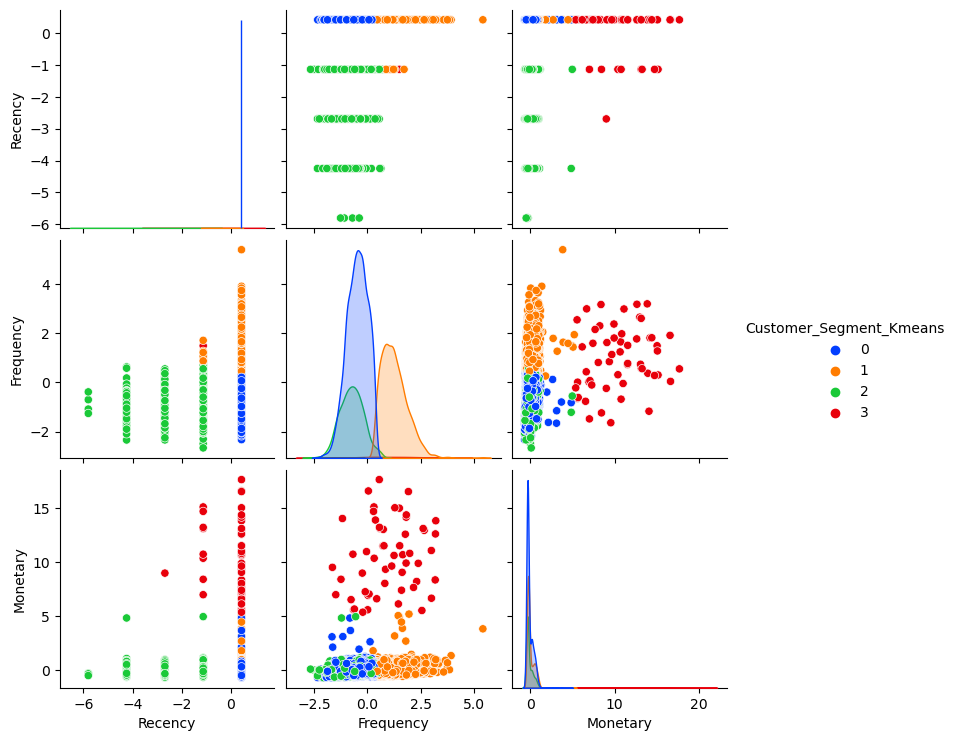

In [48]:
import seaborn as sns
import pandas as pd

# Add the cluster assignments and the scaled RFM values back into the dataframe for plotting
rfm_df_plot = pd.DataFrame(rfm_scaled, columns=['Recency','Frequency', 'Monetary'])
rfm_df_plot['Customer_Segment_Kmeans'] = kmeans.labels_ 

# Use seaborn's pairplot to create pairwise scatter plots
sns.pairplot(rfm_df_plot, hue='Customer_Segment_Kmeans', vars=['Recency','Frequency', 'Monetary'], palette='bright')
plt.show()


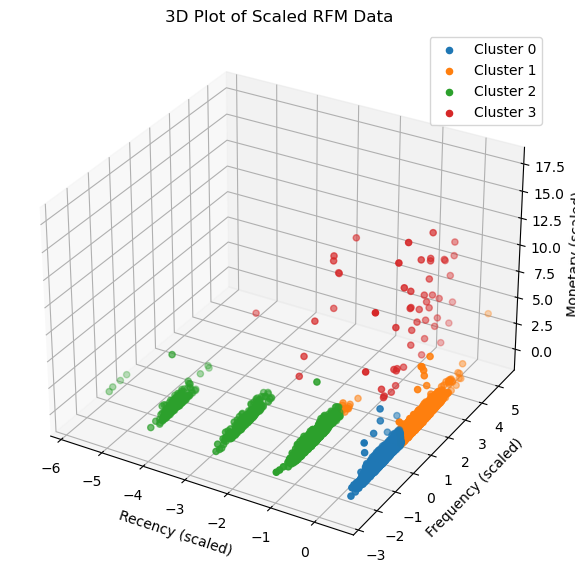

In [70]:
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt

fig = plt.figure(figsize=(10, 7))
ax = fig.add_subplot(111, projection='3d')

# Plot each cluster with a different color and label
for i in np.unique(kmeans.labels_):
    ax.scatter(rfm_scaled[kmeans.labels_ == i, 0], rfm_scaled[kmeans.labels_ == i, 1], rfm_scaled[kmeans.labels_ == i, 2], 
               label=f'Cluster {i}')

ax.set_xlabel('Recency (scaled)')
ax.set_ylabel('Frequency (scaled)')
ax.set_zlabel('Monetary (scaled)')
ax.set_title('3D Plot of Scaled RFM Data')
ax.legend()  # Display the legend

plt.show()


### Logarithmic

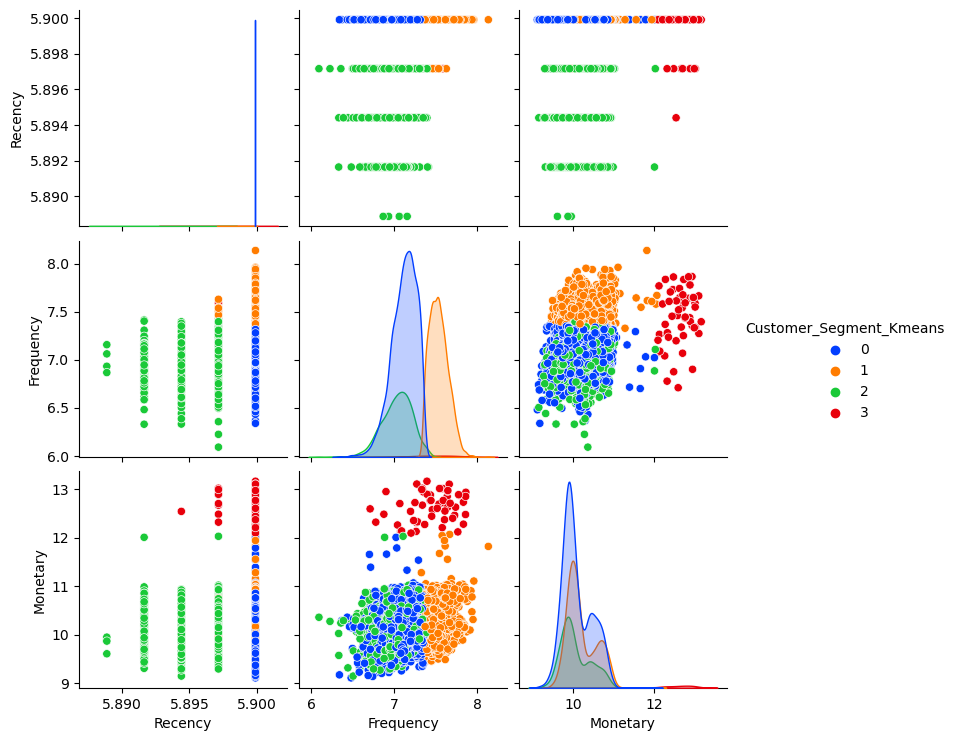

In [49]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt


# Apply a logarithmic transformation to the RFM values
rfm_df_log_scale = rfm_df[['Recency', 'Frequency', 'Monetary']].apply(np.log1p)
rfm_df_log_scale['Customer_Segment_Kmeans'] = kmeans.labels_

# plot the pairplot with the log scale
sns.pairplot(rfm_df_log_scale, hue='Customer_Segment_Kmeans', vars=['Recency', 'Frequency', 'Monetary'], palette='bright')
plt.show()


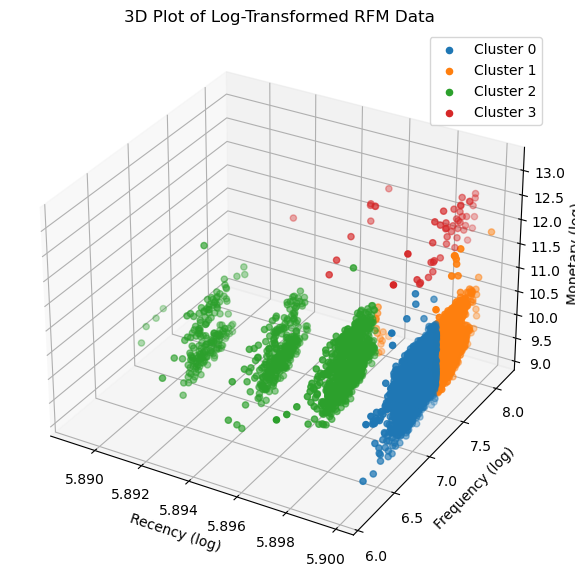

In [71]:
fig = plt.figure(figsize=(7, 7))
ax = fig.add_subplot(111, projection='3d')

for i in np.unique(kmeans.labels_):
    cluster_data = rfm_log[kmeans.labels_ == i]
    ax.scatter(cluster_data['Recency'], cluster_data['Frequency'], cluster_data['Monetary'], 
               label=f'Cluster {i}')

ax.set_xlabel('Recency (log)')
ax.set_ylabel('Frequency (log)')
ax.set_zlabel('Monetary (log)')
ax.set_title('3D Plot of Log-Transformed RFM Data')
ax.legend()  

plt.show()


The K means clustering has also allowed us to segment the data:
- cluster 3: champion customers, spent recently, very frequently and spent a lot
- cluster 2: havent spent as recently, low frequency and low monetary
- cluster 1: high recency, high frequency and low monetary 
- cluster 0: high recency, low frequency, low monetary 

### Clustering through Gaussian Mixture Model

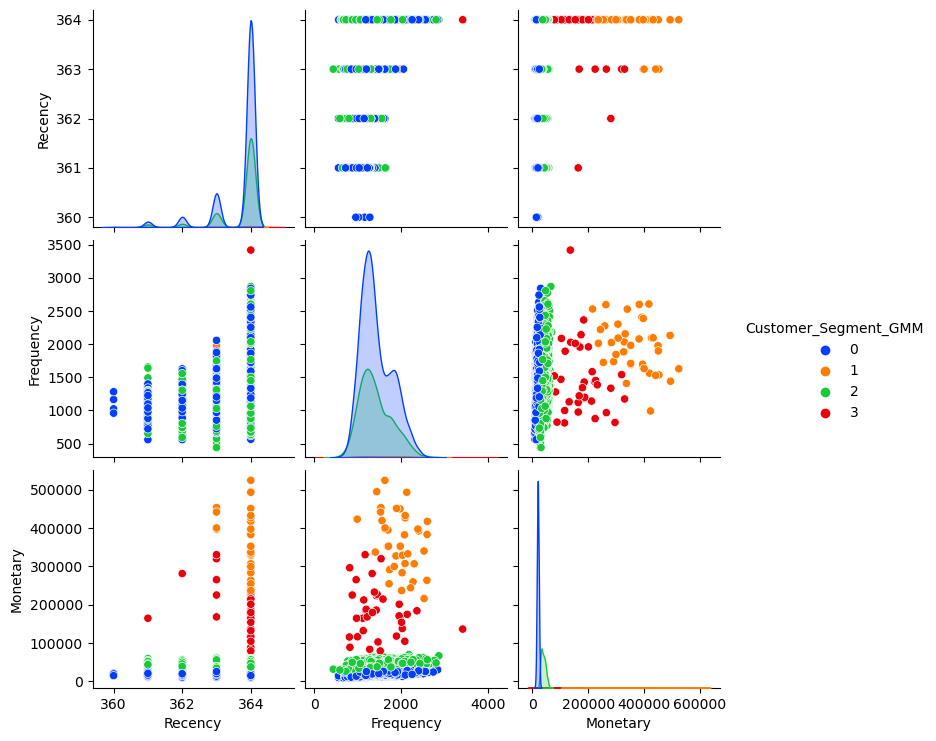

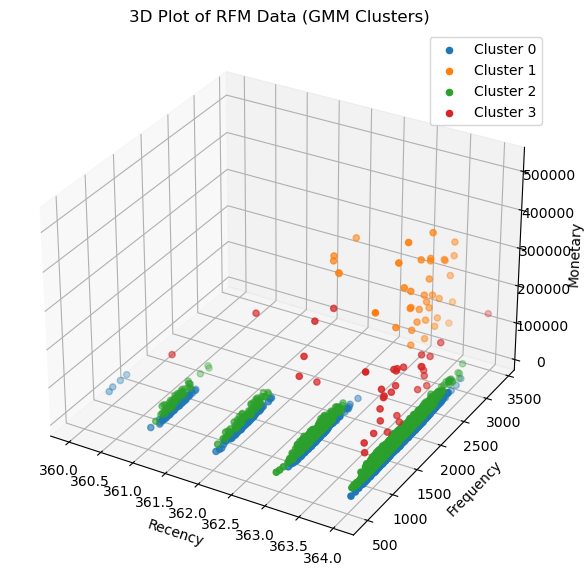

In [61]:
from sklearn.mixture import GaussianMixture
import seaborn as sns
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D


# Step 1: Fit the Gaussian Mixture Model
gmm = GaussianMixture(n_components=4, random_state=1)  # Adjust n_components as necessary
rfm_df['Customer_Segment_GMM'] = gmm.fit_predict(rfm_df[['Recency', 'Frequency', 'Monetary']])

# Step 2: Draw a pairplot
sns.pairplot(rfm_df, hue='Customer_Segment_GMM', vars=['Recency', 'Frequency', 'Monetary'], palette='bright')
plt.show()

# Step 3: Create a 3D diagram
fig = plt.figure(figsize=(10, 7))
ax = fig.add_subplot(111, projection='3d')
for i in np.unique(rfm_df['Customer_Segment_GMM']):
    ax.scatter(rfm_df.loc[rfm_df['Customer_Segment_GMM'] == i, 'Recency'],
               rfm_df.loc[rfm_df['Customer_Segment_GMM'] == i, 'Frequency'],
               rfm_df.loc[rfm_df['Customer_Segment_GMM'] == i, 'Monetary'],
               label=f'Cluster {i}')
ax.set_xlabel('Recency')
ax.set_ylabel('Frequency')
ax.set_zlabel('Monetary')
ax.set_title('3D Plot of RFM Data (GMM Clusters)')
ax.legend()
plt.show()



Segmented mainly by monetary
- cluster 0: range of frequency, low monetary, good recency
- cluster 1: highest frequency, highest monetaty 
- cluster 2: similar to 0, but higher monetary
- cluster 3: higher frequency, low monetary

### GMM with logarithmic 

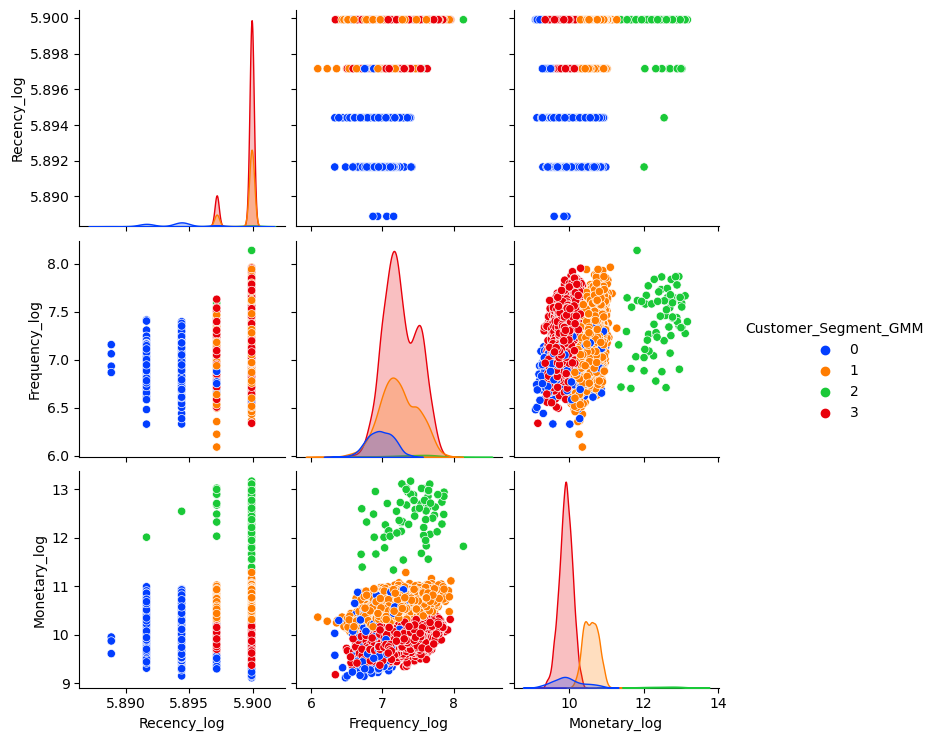

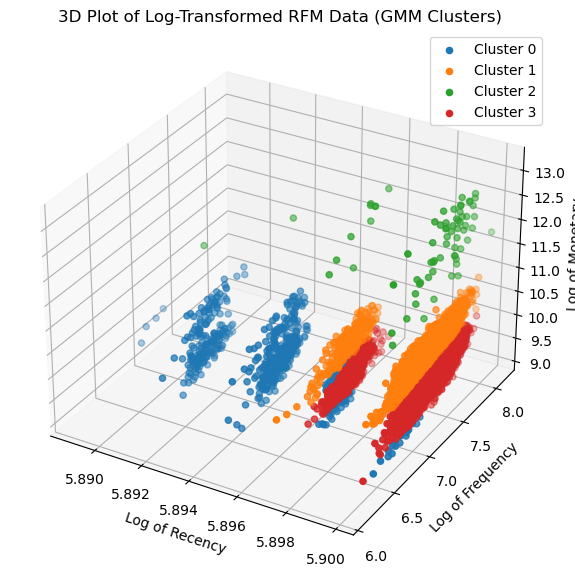

In [69]:
import numpy as np
from sklearn.mixture import GaussianMixture
import seaborn as sns
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

# Step 0: Apply log transformation to the data
rfm_log = np.log1p(rfm_df[['Recency', 'Frequency', 'Monetary']])

# Step 1: Fit the Gaussian Mixture Model on log-transformed data
gmm = GaussianMixture(n_components=4, random_state=1)
rfm_df['Customer_Segment_GMM'] = gmm.fit_predict(rfm_log)

# Add the log-transformed values back to rfm_df for pairplot and 3D plot
rfm_df[['Recency_log', 'Frequency_log', 'Monetary_log']] = rfm_log

# Step 2: Draw a pairplot with log-transformed data
sns.pairplot(rfm_df, hue='Customer_Segment_GMM', vars=['Recency_log', 'Frequency_log', 'Monetary_log'], palette='bright')
plt.show()

# Step 3: Create a 3D diagram with log-transformed data
fig = plt.figure(figsize=(10, 7))
ax = fig.add_subplot(111, projection='3d')
for i in np.unique(rfm_df['Customer_Segment_GMM']):
    ax.scatter(rfm_df.loc[rfm_df['Customer_Segment_GMM'] == i, 'Recency_log'],
               rfm_df.loc[rfm_df['Customer_Segment_GMM'] == i, 'Frequency_log'],
               rfm_df.loc[rfm_df['Customer_Segment_GMM'] == i, 'Monetary_log'],
               label=f'Cluster {i}')
ax.set_xlabel('Log of Recency')
ax.set_ylabel('Log of Frequency')
ax.set_zlabel('Log of Monetary')
ax.set_title('3D Plot of Log-Transformed RFM Data (GMM Clusters)')
ax.legend()
plt.show()


- cluster 0: low value customers
- cluster 1: high recency, moderate-high frequency, moderate monetary 
- cluster 2: high value customers, mainly high recency, moderate frequency, high monetary
- cluster 3: low monetary, high recency, moderate-high frequency

- Champions customers: reward them eg. early adopters of new products, will promote LLoyds and could send referrals
- High value customers: upsell higher value products eg. Club Lloyds platinum - could look into travel payments in next dataset 
- Medium value customers: Offer personalised recommendations, keep them engaged, provide helpful tips
- Low value: standard emails, do not spend two much money

I personally think the k-means scaled clustering is the best clustering technique.